#Лабораторная работа №4
## Выделение контуров на изображениях

Для свертки использовать написанную ранее в ЛР1 функцию, по необходимость дописать её для работы с масками с четной размерностью.

1. Считать цветное rgb изображение. Преобразовать в градации серого.
2. Написать функцию свёртки (прохождение окном).
3. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами
4. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

5. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в tg ***volfgunus***

Ссылки на полезные ресурсы:

1.    [Методичка по локальным методам выделения контуров](http://repo.ssau.ru/bitstream/Metodicheskie-ukazaniya/Lokalnye-metody-vydeleniya-konturov-Elektronnyi-resurs-elektron-metod-ukazaniya-k-lab-rabote-2-53487/1/%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%20%D0%92.%D0%92.%20%D0%9B%D0%BE%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B.pdf)
1.    [Методичка по локальным методам выделения контуров 2](https://drive.google.com/file/d/1l0zopB8B4Ep8HyzjQb0YRrLZweYDBtte/view?usp=sharing)
1.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)

# Варианты задания


№ варианта | Задание 3 | Задание 4 | Задание 5
--- | :---: | :---:  | :---:
1 | модуль градиента как он есть | Оператор Робертса  |   Аппроксимация поверхностью 2-го порядка, окно 3x3
2 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3
3 | модуль градиента аппроксимируется максимумом среди модулей производных | Оператор Лапласа  |  Аппроксимация поверхностью 1-го порядка, окно 3x3
4 | модуль градиента как он есть | Оператор Лапласа  |  Аппроксимация поверхностью 1-го порядка, окно 3x3
5 | модуль градиента аппроксимируется суммой модулей производных | Оператор Робертса  |  Аппроксимация поверхностью 2-го порядка, окно 3x3
6 | модуль градиента аппроксимируется максимумом среди модулей производных | Оператор Робертса  |  Аппроксимация поверхностью 2-го порядка, окно 3x3
7 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3
8 | модуль градиента как он есть | Оператор Лапласа  |   Аппроксимация поверхностью 1-го порядка, окно 3x3
9 | модуль градиента аппроксимируется максимумом среди модулей производных | Оператор Лапласа  |   Аппроксимация поверхностью 1-го порядка, окно 3x3
10 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3
11 | модуль градиента аппроксимируется суммой модулей производных | Оператор Лапласа  |  Аппроксимация поверхностью 1-го порядка, окно 3x3

# Контрольные темы

1.  Выделение контуров: определение контура, основные понятия.
2.  Дифференциальные методы первого порядка выделения контуров: общий подход.
3.  Дифференциальные методы второго порядка выделения контуров: общий подход.
4.  Методы выделения перепадов яркости с согласованием: общий подход (на примере дифференциального метода первого порядка и обработки изображения окном 2x2).

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. Считать цветное изображение. Преобразовать в градации серого.

Исходное изображение:


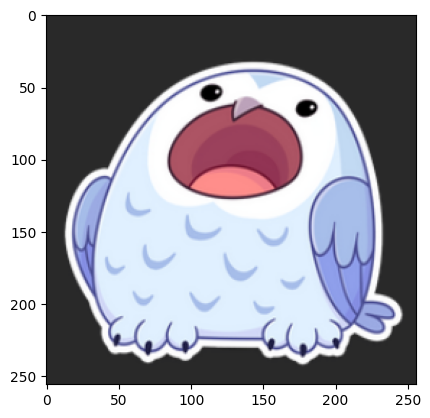

Изображение в градациях серого:


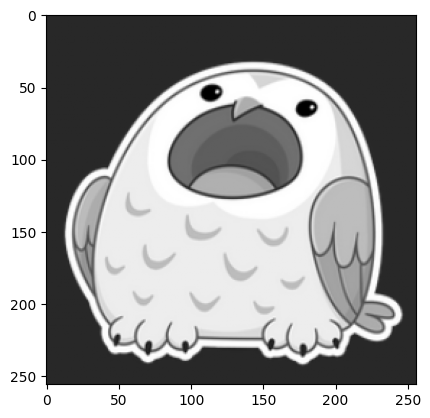

In [42]:
def to_grayscale(image):
    image_gray = np.zeros([image.shape[0],image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i][j] = 0.2989*image[i,j,0]+0.5870*image[i,j,1]+0.1140*image[i,j,2]
    return image_gray

def normalize(image):
    return (255 * ((image-image.min()) / (image.max()-image.min()))).astype(np.uint8)

def to_bin(image, thresh):
    image_bin = np.zeros_like(image, dtype=bool)
    image_bin[image > thresh] = True
    return image_bin

def show_image(image):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()


image_orig = cv2.resize(cv2.imread('img1.png',1).astype('uint8')[:,:,::-1], (256,256))
print("Исходное изображение:")
show_image(image_orig)

image_gray = to_grayscale(image_orig)
print("Изображение в градациях серого:")
show_image(image_gray)

2. Написать функцию свертки (прохождение окном)

In [43]:
def convolution_by_map(image, kernel):
    img_h, img_w = image.shape
    h_h, h_w = kernel.shape
    center_h_height = h_h // 2
    center_h_width = h_w // 2
    
    image_l = np.zeros((img_h + h_h, img_w + h_w), dtype=np.uint8)
    image_l[center_h_height:center_h_height+img_h, center_h_width:center_h_width+img_w] = image
    image_conv = np.zeros_like(image, dtype=int)
    
    for i in range(img_h):
        for j in range(img_w):
            for k in range(h_h):
                for l in range(h_w):
                    image_conv[i,j] += image_l[h_h + i - k - 1, h_w + j - l - 1] * kernel[k,l]
    
    return image_conv

3. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

Вариант №
7 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3

In [44]:
def simple_gradient(image):
    h1 = np.array([[-1],[1]])
    h2 = np.array([[-1,1]])
    
    dh1 = convolution_by_map(image,h1)
    dh2 = convolution_by_map(image,h2)
    
    grad = abs(dh1) + abs(dh2)
    
    image_contours = to_bin(normalize(grad),40)
    
    return image_contours

Изображение в градациях серого:


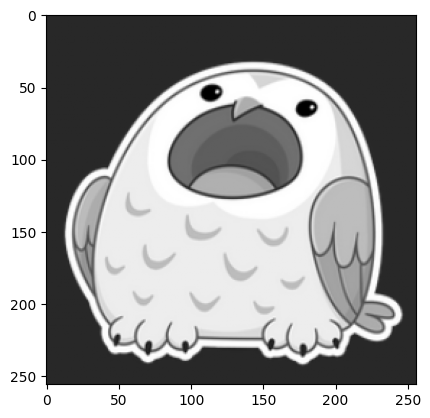

Бинарное изображение с контурами:


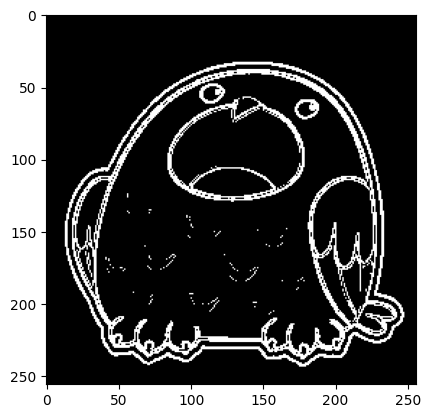

In [45]:
print("Изображение в градациях серого:")
show_image(image_gray)
print("Бинарное изображение с контурами:")
show_image(simple_gradient(image_gray))

4. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

Вариант 7 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3

In [46]:
def sobel_gradient(image):
    h1 = np.array([
        [-1,-2,-1],
        [ 0, 0, 0],
        [ 1, 2, 1]
    ])
    
    h2 = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    
    dh1 = convolution_by_map(image,h1)
    dh2 = convolution_by_map(image,h2)
    
    grad = (np.sqrt(dh1**2 + dh2**2))
    
    image_contours = to_bin(normalize(grad),40)
    
    return image_contours

Изображение в градациях серого:


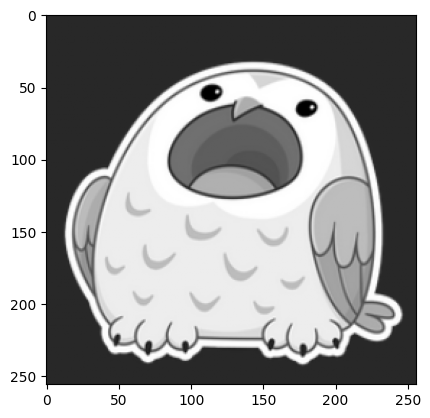

Бинарное изображение с контурами:


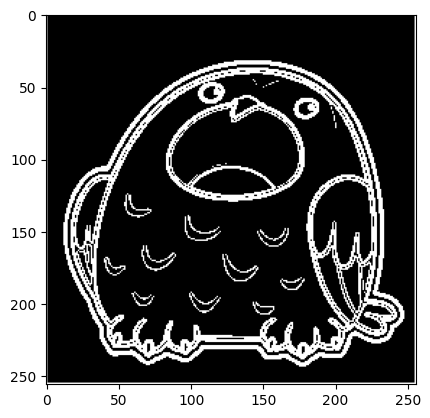

In [47]:
print("Изображение в градациях серого:")
show_image(image_gray)
print("Бинарное изображение с контурами:")
show_image(sobel_gradient(image_gray))

5. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами
  
Вариант 7 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3

In [48]:
def coord_gradient(image):
    h = np.array([
        [ 2,-1, 2],
        [-1,-4,-1],
        [ 2,-1, 2]
    ])/3
    
    dh = convolution_by_map(image,h)
    
    grad = abs(dh)
    
    image_contours = to_bin(normalize(grad), 40)
    
    return image_contours

Изображение в градациях серого:


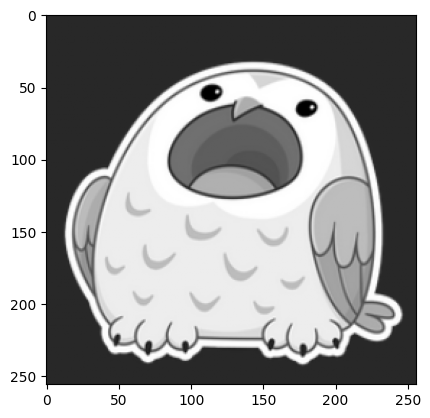

Бинарное изображение с контурами:


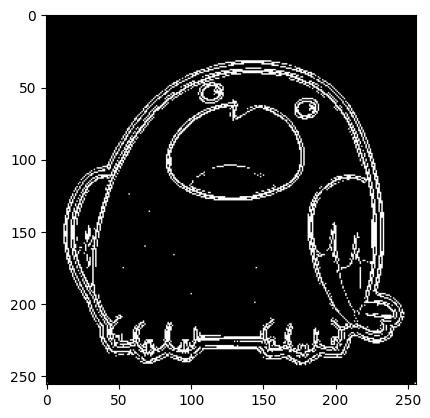

In [49]:
print("Изображение в градациях серого:")
show_image(image_gray)
print("Бинарное изображение с контурами:")
show_image(coord_gradient(image_gray))